In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
def to_hours(time):
    return (time // 3600) + 6

def clean_sales_data():
    df = pd.read_csv("../assets/example_data/sales_data.csv")
    sales_df = df[['token_id', 'sold_at', 'price']]
    sales_df = sales_df.rename(columns={'token_id': 'horse_id', 'sold_at': 'time_sold'}).sort_values('horse_id').reset_index(drop=True)
    sales_df['time_sold'] = sales_df['time_sold'].apply(to_hours)

    return sales_df

In [262]:
sales_data = clean_sales_data()

In [263]:
eth_prices = pd.read_csv('../assets/eth_price_history.csv')
eth_prices.tail()

,Unnamed: 0,timestamp,eth_price
9091,9091,464923,1533.01
9092,9092,464924,1529.65
9093,9093,464925,1535.38
9094,9094,464926,1538.76
9095,9095,464927,1550.97


In [264]:
merged = pd.merge(sales_data, eth_prices, left_on='time_sold', right_on='timestamp', how='left')
merged['converted_price'] = merged['price'] * merged['eth_price']
clean_market_data = merged.drop(columns=['Unnamed: 0', 'price', 'timestamp','eth_price'])
clean_market_data.shape
clean_market_data

,horse_id,time_sold,converted_price
0,27,458373,60665.000
1,68,460370,13934.205
2,75,460370,9693.360
3,89,460370,9693.360
4,92,461981,10943.775
...,...,...,...
74906,520344,464862,139.492
74907,520345,464871,138.079
74908,520346,464863,139.884
74909,520404,464901,499.436


In [265]:
# horse data cleaning
horse_data = pd.read_csv('../assets/all_horse_meta.csv')
horse_data.columns
horse_data = horse_data.rename(columns={'data.horse.bloodline':'bloodline', 'data.horse.breed_type':'breed_type',
                           'data.horse.breeding_counter':'breeding_counter', 'data.horse.color':'horse_color',
                           'data.horse.horse_type':'horse_type', 'data.horse.img_url':'img_url',
                           'data.horse.last_breeding_reset':'last_breeding_reset', 'data.horse.name':'horse_name',
                           'data.horse.nft_id':'nft_id', 'data_horse_offsprings':'offsprings',
                           'data.horse.race_statistic.first_place_finishes':'first_place_finishes',
                           'data.horse.race_statistic.number_of_races':'number_races',
       'data.horse.race_statistic.second_place_finishes':'second_place_finishes',
       'data.horse.race_statistic.third_place_finishes':'third_place_finishes',
       'data.horse.race_statistic.win_rate':'win_rate',
                                        'data.horse.gen':'genotype'})
horse_data = horse_data.drop(columns=['Unnamed: 0'])
print(horse_data.nft_id)
horse_data.head()

0      154936
1      393233
2      131092
3      131093
4      393237
        ...  
103    131738
104       668
105    131749
106    131767
107    131778
Name: nft_id, Length: 108, dtype: int64


,bloodline,breed_type,breeding_counter,horse_color,genotype,horse_type,img_url,data.horse.inserted_at,last_breeding_reset,horse_name,nft_id,first_place_finishes,number_races,second_place_finishes,third_place_finishes,win_rate
0,Buterin,exclusive,3,Dark Byzantium,Z10,Stallion,https://img.zed.run/horses/5D3954.png,2021-11-26T20:32:39,2022-12-23T20:28:07Z,Scrunter S Thompson,154936,11,101,7,10,10.89
1,Nakamoto,exclusive,3,Fandango,Z5,Colt,https://img.zed.run/horses/B53389.png,2022-04-15T08:36:23,2022-12-23T08:31:54Z,Nakuza,393233,6,131,15,12,4.58
2,Finney,legendary,3,Air Superiority Blue,Z7,Stallion,https://img.zed.run/horses/72A0C1.png,2021-10-17T06:37:21,2023-01-08T06:30:43Z,Glorified Liberty,131092,5,65,7,8,7.69
3,Nakamoto,exclusive,3,Battle Horse Gray,Z6,Colt,https://img.zed.run/horses/848482.png,2021-10-17T06:37:43,2023-01-08T06:31:09Z,Glorified Ecstasy,131093,12,151,9,15,7.95
4,Buterin,elite,3,Eminence,Z16,Colt,https://img.zed.run/horses/6C3082.png,2022-04-15T08:51:24,2022-12-23T08:46:42Z,System America,393237,0,11,0,1,0.00


In [266]:
# code to merge horse data with sales data
test_merge = pd.merge(horse_data,clean_market_data, right_on='horse_id', left_on='nft_id', how='left')
test_merge

,bloodline,breed_type,breeding_counter,horse_color,genotype,horse_type,img_url,data.horse.inserted_at,last_breeding_reset,horse_name,nft_id,first_place_finishes,number_races,second_place_finishes,third_place_finishes,win_rate,horse_id,time_sold,converted_price
0,Buterin,exclusive,3,Dark Byzantium,Z10,Stallion,https://img.zed.run/horses/5D3954.png,2021-11-26T20:32:39,2022-12-23T20:28:07Z,Scrunter S Thompson,154936,11,101,7,10,10.89,154936,464926,15.38760
1,Buterin,exclusive,3,Dark Byzantium,Z10,Stallion,https://img.zed.run/horses/5D3954.png,2021-11-26T20:32:39,2022-12-23T20:28:07Z,Scrunter S Thompson,154936,11,101,7,10,10.89,154936,463789,11.69660
2,Nakamoto,exclusive,3,Fandango,Z5,Colt,https://img.zed.run/horses/B53389.png,2022-04-15T08:36:23,2022-12-23T08:31:54Z,Nakuza,393233,6,131,15,12,4.58,393233,460256,34.63614
3,Finney,legendary,3,Air Superiority Blue,Z7,Stallion,https://img.zed.run/horses/72A0C1.png,2021-10-17T06:37:21,2023-01-08T06:30:43Z,Glorified Liberty,131092,5,65,7,8,7.69,131092,460471,42.42640
4,Nakamoto,exclusive,3,Battle Horse Gray,Z6,Colt,https://img.zed.run/horses/848482.png,2021-10-17T06:37:43,2023-01-08T06:31:09Z,Glorified Ecstasy,131093,12,151,9,15,7.95,131093,461771,46.86210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Nakamoto,genesis,0,Thistle,Z2,Mare,https://img.zed.run/horses/D8BFD8.png,2019-03-22T04:55:23,2022-12-23T04:55:12Z,Guardian,668,88,589,68,58,14.94,668,462635,6415.40000
152,Nakamoto,genesis,0,Thistle,Z2,Mare,https://img.zed.run/horses/D8BFD8.png,2019-03-22T04:55:23,2022-12-23T04:55:12Z,Guardian,668,88,589,68,58,14.94,668,463797,5284.62000
153,Nakamoto,exclusive,3,Misty Rose,Z7,Stallion,https://img.zed.run/horses/FFE4E1.png,2021-10-18T22:54:26,2023-01-09T22:49:54Z,Ripsnorter,131749,17,309,33,30,5.50,131749,458982,117.96590
154,Finney,exclusive,3,Burnt Umber,Z16,Stallion,https://img.zed.run/horses/8A3324.png,2021-10-18T23:28:47,2023-01-09T23:24:00Z,Walk In The Park,131767,22,204,21,22,10.78,131767,459321,36.64100


## Exploratory Data Analysis

### Price Distribution

<AxesSubplot: xlabel='converted_price', ylabel='Count'>

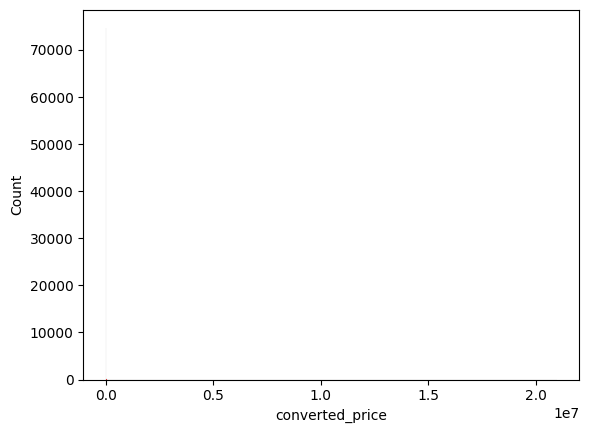

In [267]:
sns.histplot(data = clean_market_data, x='converted_price', bins=1000, color='red')
# plt.xlim(0,20000)
# plt.ylim(0,80)

The distribution of prices is highly right skewed.

### Win rate vs Price

<AxesSubplot: xlabel='win_rate', ylabel='converted_price'>

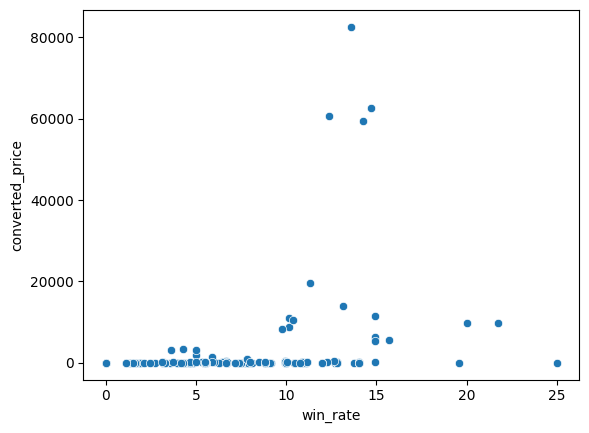

In [268]:
sns.scatterplot(data=test_merge, x='win_rate', y='converted_price')

### Different Factors by Breed

In [269]:
by_breed = test_merge.groupby('breed_type').mean().reset_index()
by_breed

C:\Users\dgnic\AppData\Local\Temp\ipykernel_27044\2082808561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_breed = test_merge.groupby('breed_type').mean().reset_index()


,breed_type,breeding_counter,nft_id,first_place_finishes,number_races,second_place_finishes,third_place_finishes,win_rate,horse_id,time_sold,converted_price
0,elite,2.285714,356027.464286,11.000000,172.464286,12.571429,15.428571,5.496786,356027.464286,461307.535714,23.789273
1,exclusive,2.032258,292769.338710,23.838710,298.338710,23.532258,25.112903,6.496290,292769.338710,460264.919355,42.411367
2,genesis,1.300000,336.300000,93.050000,739.650000,93.650000,86.600000,11.998000,336.300000,460401.050000,19831.065600
3,legendary,2.152174,325128.000000,28.217391,312.239130,27.869565,26.956522,7.393696,325128.000000,459724.652174,153.862969


Text(0.5, 1.0, 'Mean Win Rate by Breed Type')

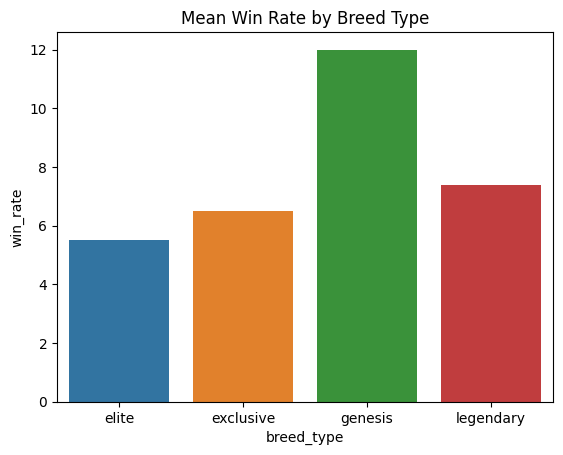

In [270]:
sns.barplot(data=by_breed, x='breed_type', y='win_rate')
plt.title('Mean Win Rate by Breed Type')

Text(0.5, 1.0, 'Mean Number of 1st Place Finishes by Breed')

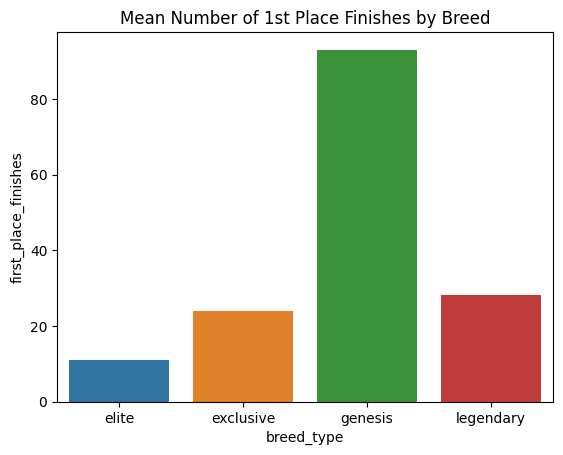

In [271]:
sns.barplot(data=by_breed, x='breed_type', y='first_place_finishes')
plt.title('Mean Number of 1st Place Finishes by Breed')

<AxesSubplot: xlabel='breed_type', ylabel='converted_price'>

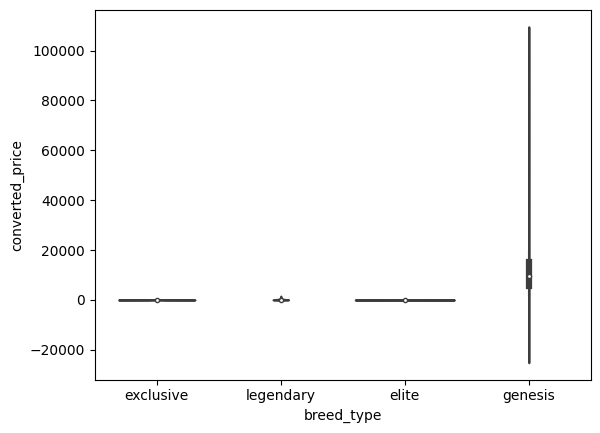

In [272]:
sns.violinplot(data=test_merge, x='breed_type', y='converted_price')

### Different Factors by Bloodline

In [273]:
by_blood = test_merge.groupby('bloodline').mean().reset_index()
by_blood

C:\Users\dgnic\AppData\Local\Temp\ipykernel_27044\1323334638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_blood = test_merge.groupby('bloodline').mean().reset_index()


,bloodline,breeding_counter,nft_id,first_place_finishes,number_races,second_place_finishes,third_place_finishes,win_rate,horse_id,time_sold,converted_price
0,Buterin,2.239130,337539.478261,11.847826,165.195652,14.652174,14.630435,5.927826,337539.478261,460217.021739,28.807253
1,Finney,2.219512,303984.463415,33.902439,361.829268,29.585366,27.780488,7.143902,303984.463415,459983.024390,59.058916
2,Nakamoto,1.844444,142979.644444,46.711111,435.688889,49.200000,48.422222,8.696222,142979.644444,460696.666667,8909.322748
3,Szabo,1.583333,360784.125000,37.833333,435.083333,36.041667,40.416667,7.493333,360784.125000,460323.083333,97.022506


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Buterin'),
  Text(1, 0, 'Finney'),
  Text(2, 0, 'Nakamoto'),
  Text(3, 0, 'Szabo')])

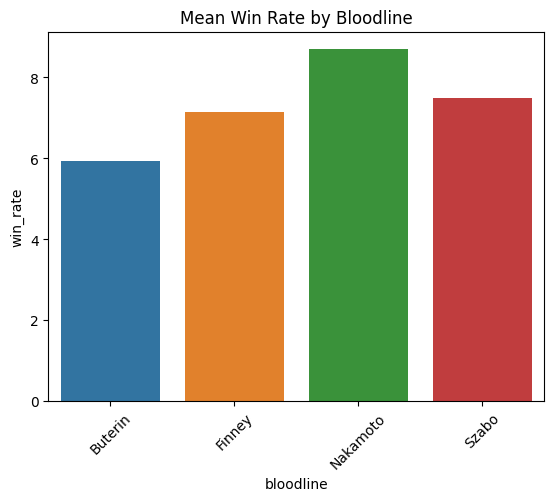

In [274]:
sns.barplot(data=by_blood, x='bloodline', y='win_rate')
plt.title('Mean Win Rate by Bloodline')
plt.xticks(rotation = 45)